# Data Scientist's Salary Prediction

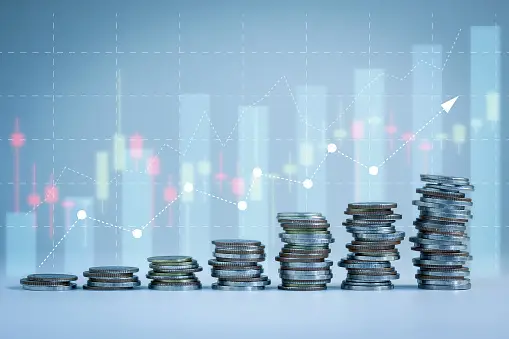

## Importing Libraries

In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [2]:
# Loading the dataset
df = pd.read_csv("glassdoor_jobs.csv", index_col='Unnamed: 0')

# **Exploring Dataset**

In [3]:
df.shape

(956, 14)

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [5]:
df.dtypes

Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
dtype: object

In [6]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 955
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Job Description    956 non-null    object 
 3   Rating             956 non-null    float64
 4   Company Name       956 non-null    object 
 5   Location           956 non-null    object 
 6   Headquarters       956 non-null    object 
 7   Size               956 non-null    object 
 8   Founded            956 non-null    int64  
 9   Type of ownership  956 non-null    object 
 10  Industry           956 non-null    object 
 11  Sector             956 non-null    object 
 12  Revenue            956 non-null    object 
 13  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 112.0+ KB


#### No feature has NaN values, but there may be the case where the NaN values are replaced by some other value(s) like -1, 0, etc._

In [8]:
df.describe()

,Rating,Founded
count,956.000000,956.000000
mean,3.601255,1774.605649
std,1.067619,598.942517
min,-1.000000,-1.000000
25%,3.300000,1937.000000
50%,3.800000,1992.000000
75%,4.200000,2008.000000
max,5.000000,2019.000000


##### NaN values are replace by -1 in numeric features._

## Exploratory Data Analysis & Data Cleaning

<Figure size 600x600 with 0 Axes>

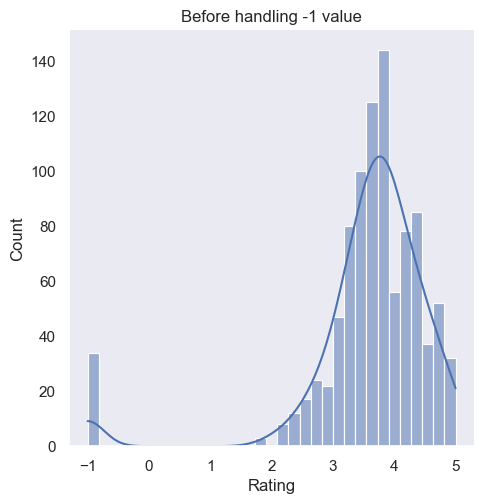

In [9]:
# Visualising Rating column
plt.figure(figsize=(6,6))
sns.displot(data=df['Rating'], kde=True)
plt.grid(False)
plt.title('Before handling -1 value')
plt.show()

#### Since the Rating feature follows the Gaussian/Normal Distribution, we'll replace -1 values with mean of the distribution.

<Figure size 600x600 with 0 Axes>

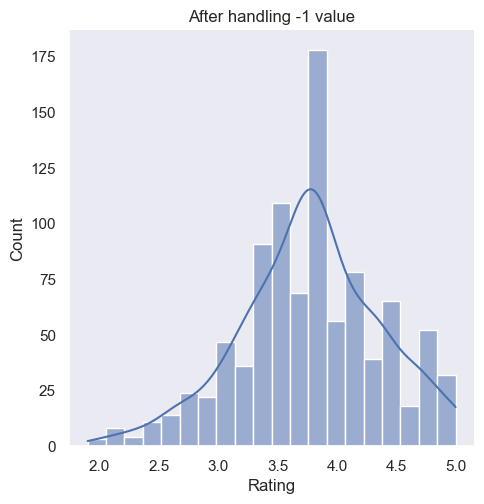

In [10]:
df['Rating'] = df['Rating'].apply(lambda x: np.NaN if x==-1 else x)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

plt.figure(figsize=(6,6))
sns.displot(data=df['Rating'], kde=True)
plt.grid(False)
plt.title('After handling -1 value')
plt.show()

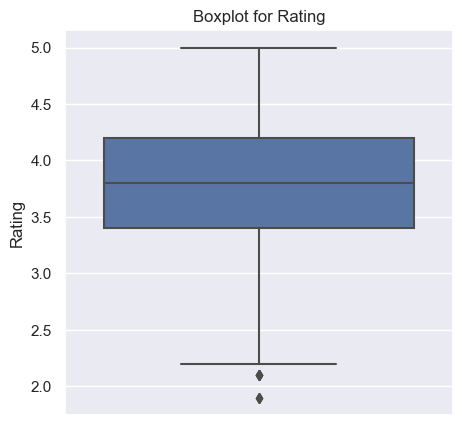

In [11]:
# Outliers in Rating
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating', data=df)
plt.title('Boxplot for Rating')
plt.ylabel('Rating')
plt.show()

<Figure size 600x600 with 0 Axes>

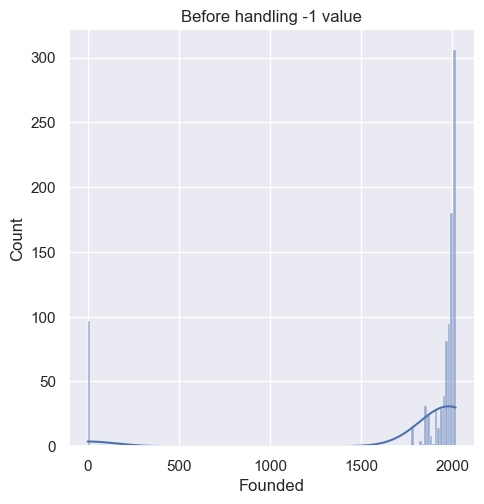

In [12]:
# Visualising Founded column
plt.figure(figsize=(6,6))
sns.displot(data=df['Founded'], kde=True)
plt.title('Before handling -1 value')
plt.show()

<Figure size 600x600 with 0 Axes>

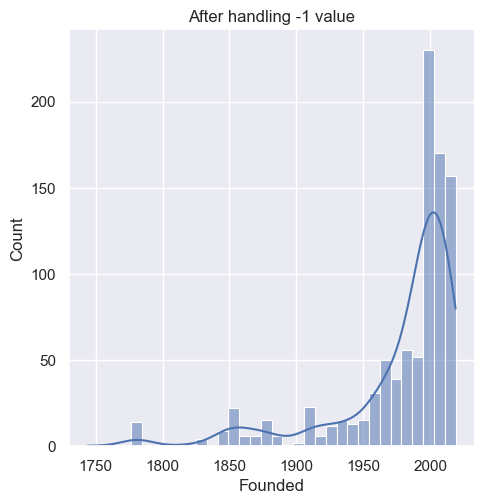

In [13]:
# Handling -1 values in Founded column
df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
df['Founded'] = df['Founded'].fillna(int(df['Founded'].median()))
df['Founded'] = df['Founded'].astype('int')

plt.figure(figsize=(6,6))
sns.displot(data=df['Founded'], kde=True)
plt.title('After handling -1 value')
plt.show()

Text(0, 0.5, 'Founded year')

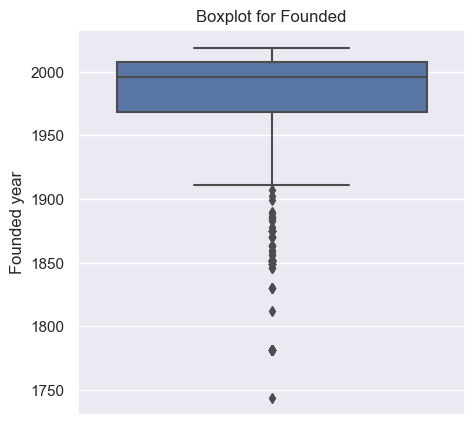

In [14]:
# Outliers in Founded
plt.figure(figsize=(5,5))
sns.boxplot(y='Founded', data=df)
plt.title('Boxplot for Founded')
plt.ylabel('Founded year')

In [15]:
# Cleaning Job Title column
df['Job Title'].value_counts().nlargest(20)

Job Title
Data Scientist                                            178
Data Engineer                                              68
Senior Data Scientist                                      42
Data Analyst                                               18
Senior Data Engineer                                       17
Business Intelligence Analyst                              13
Senior Data Analyst                                        12
Lead Data Scientist                                         8
Data Science Manager                                        7
Principal Data Scientist                                    6
Machine Learning Engineer                                   6
Marketing Data Analyst                                      6
Sr. Data Engineer                                           6
Analytics Manager                                           5
Lead Data Engineer                                          5
Data Engineer 5 - Contract                                  

#### We can group the titles in particular groups

In [16]:
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'

df['job_title'] = df['Job Title'].apply(title_cleaner)
df['job_title'].value_counts()

job_title
data scientist    560
data engineer     158
data analyst      105
other              72
manager            35
director           13
mle                13
Name: count, dtype: int64

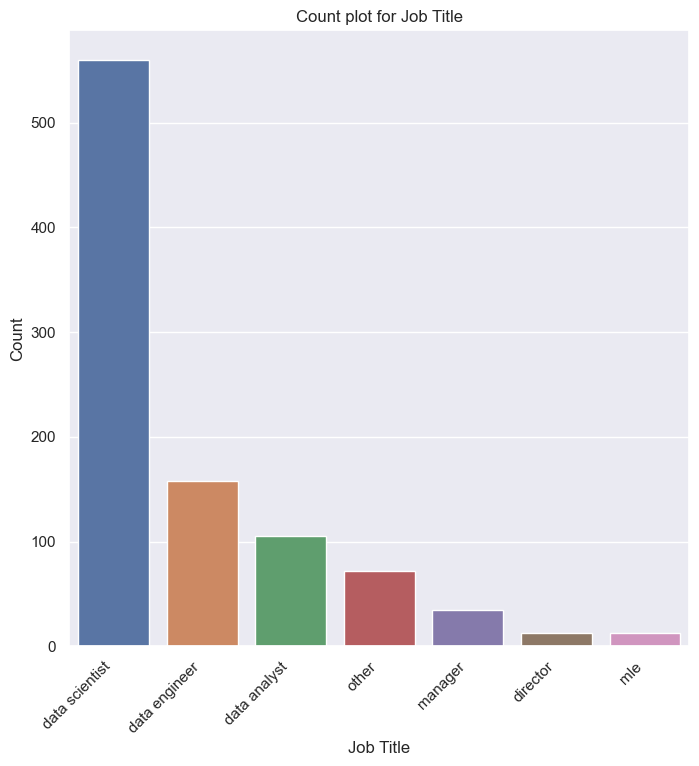

In [17]:
plt.figure(figsize=(8,8))
sns.countplot(x='job_title', data=df, order = df['job_title'].value_counts().index)
plt.title('Count plot for Job Title')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [18]:
def title_seniority(title):
    if 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'

df['job_seniority'] = df['Job Title'].apply(title_seniority)
df['job_seniority'].value_counts()

job_seniority
other    701
sr       252
jr         3
Name: count, dtype: int64

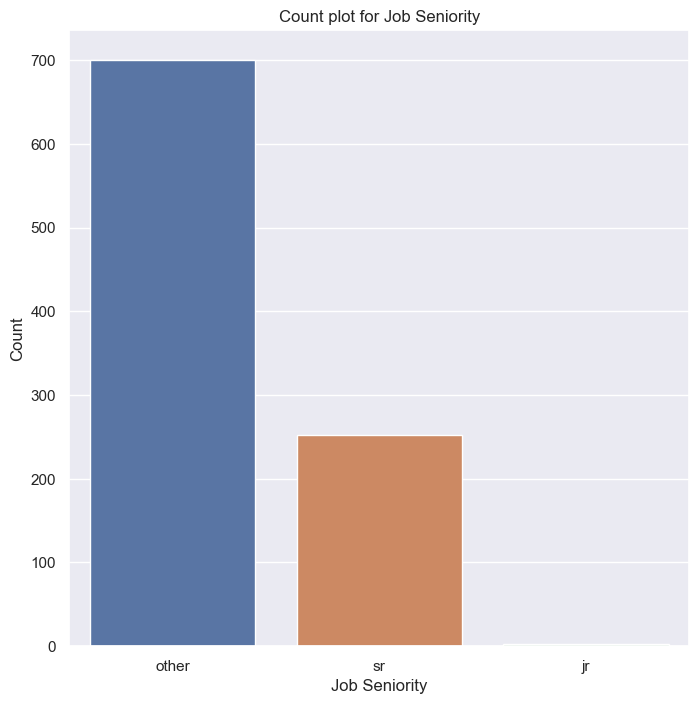

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(x='job_seniority', data=df, order = df['job_seniority'].value_counts().index)
plt.title('Count plot for Job Seniority')
plt.xlabel('Job Seniority')
plt.ylabel('Count')
plt.show()

In [20]:
# Removing Job Title column
df.drop(labels=['Job Title'], axis=1, inplace=True)

In [21]:
df['Salary Estimate'].value_counts()

Salary Estimate
-1                                  214
$86K-$143K (Glassdoor est.)           6
$54K-$115K (Glassdoor est.)           6
$49K-$113K (Glassdoor est.)           6
$21-$34 Per Hour(Glassdoor est.)      6
                                   ... 
$74K-$119K (Glassdoor est.)           1
$55K-$97K (Glassdoor est.)            1
$15K-$16K(Employer est.)              1
$61K-$106K (Glassdoor est.)           1
$62K-$113K (Glassdoor est.)           1
Name: count, Length: 417, dtype: int64

In [22]:
# Cleaning Salary Estimate column
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954             -1
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [23]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

0       $53K-$91K 
1      $63K-$112K 
2       $80K-$90K 
3       $56K-$97K 
4      $86K-$143K 
          ...     
951    $72K-$133K 
952     $56K-$91K 
953    $95K-$160K 
954            NaN
955    $61K-$126K 
Name: Salary Estimate, Length: 956, dtype: object

In [24]:
# Removing '$' and 'K' from 'Salary Estimate' column
salary = salary.apply(lambda x: x if type(x)== type(3.5) else x.replace('$','').replace('K',''))
salary

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
951    72-133 
952     56-91 
953    95-160 
954        NaN
955    61-126 
Name: Salary Estimate, Length: 956, dtype: object

In [25]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(salary.unique()))
salary.unique()[380:]

Length of Salary:  417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

#### Converting per hour salaries to per year salaries (assuming 45 work hours per week and 52 working weeks), and removing employer_provided_salary from the salary array.

In [26]:
# Removing the string employer provided salary from salary array
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace("employer provided salary:", ""))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 per hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ',
       '59-125 ', '80-142 ', '62-113 '], dtype=object)

In [27]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
    x = minlimit.strip()
    y = maxlimit.strip()
    x = int(int(minlimit)*45*52/1000)
    y = int(int(maxlimit)*45*52/1000)
    return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '63-109', '68-125 ', '39-67 ',
       '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ', '51-88 ',
       '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

<Figure size 600x600 with 0 Axes>

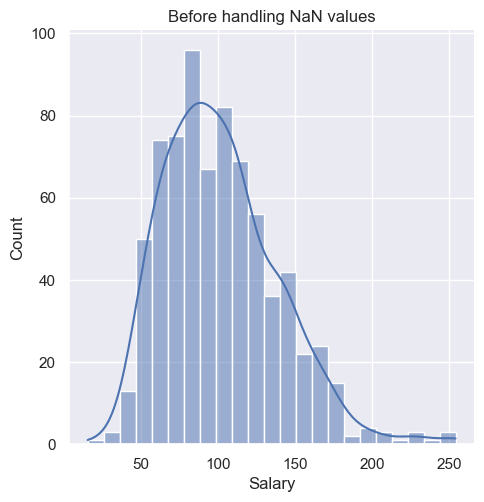

In [28]:
# Creating column for salary i.e. average of the range
df['Salary'] = salary.apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

plt.figure(figsize=(6,6))
sns.displot(data=df['Salary'], kde=True)
plt.title('Before handling NaN values')
plt.show()

#### Since the Salary feature follows the Gaussian/Normal Distribution, but since there are few outlies, we'll replace -1 values with median of the distribution.

<Figure size 600x600 with 0 Axes>

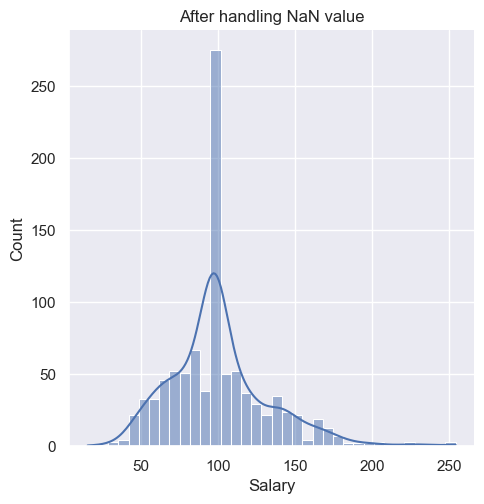

In [29]:
# Handling NaN values in Salary column
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

plt.figure(figsize=(6,6))
sns.displot(data=df['Salary'], kde=True)
plt.title('After handling NaN value')
plt.show()

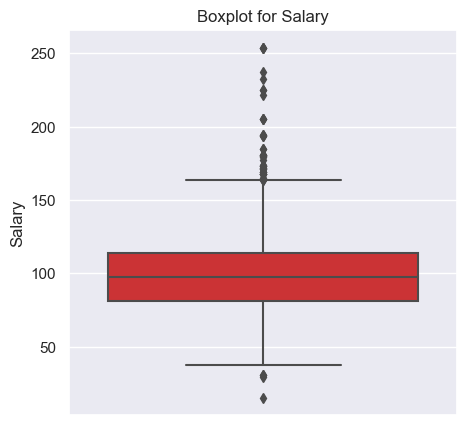

In [30]:
# Outliers in Salary
plt.figure(figsize=(5,5))
sns.boxplot(y='Salary', data=df, orient='v', palette='Set1')
plt.title('Boxplot for Salary')
plt.ylabel('Salary')
plt.show()

In [31]:
df["Company Name"].value_counts()

Company Name
Novartis\n3.8                          14
MassMutual\n3.6                        14
Takeda Pharmaceuticals\n3.7            14
Reynolds American\n3.1                 14
Software Engineering Institute\n2.6    13
                                       ..
Systems Evolution Inc.\n4.7             1
Centro\n4.1                             1
comScore\n2.5                           1
Genesis Research\n5.0                   1
Fivestars\n3.9                          1
Name: count, Length: 448, dtype: int64

In [32]:
# Cleaning Company Name column
df["Company Name"] = df['Company Name'].apply(lambda x: x.split("\n")[0])

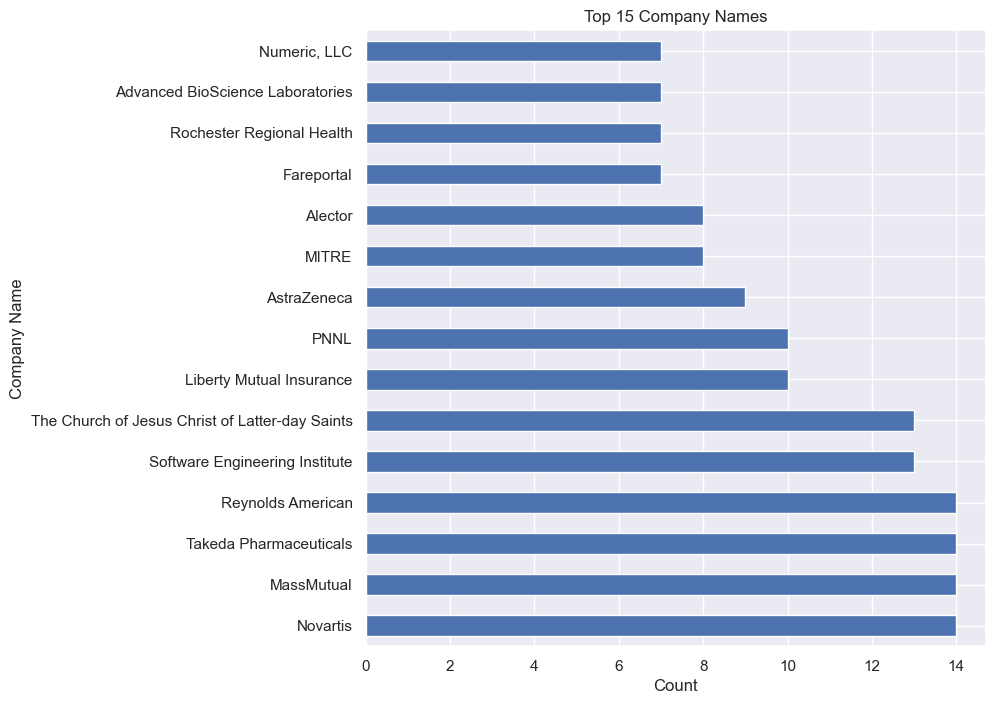

In [33]:
plt.figure(figsize=(8,8))
df["Company Name"].value_counts().nlargest(15).plot(kind='barh')
plt.title('Top 15 Company Names')
plt.xlabel('Count')
plt.show()

In [34]:
# Creating a column 'job_state'
df['job_location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print('Total number of unique locations: {}'.format(len(df['job_location'].unique())))

Total number of unique locations: 46


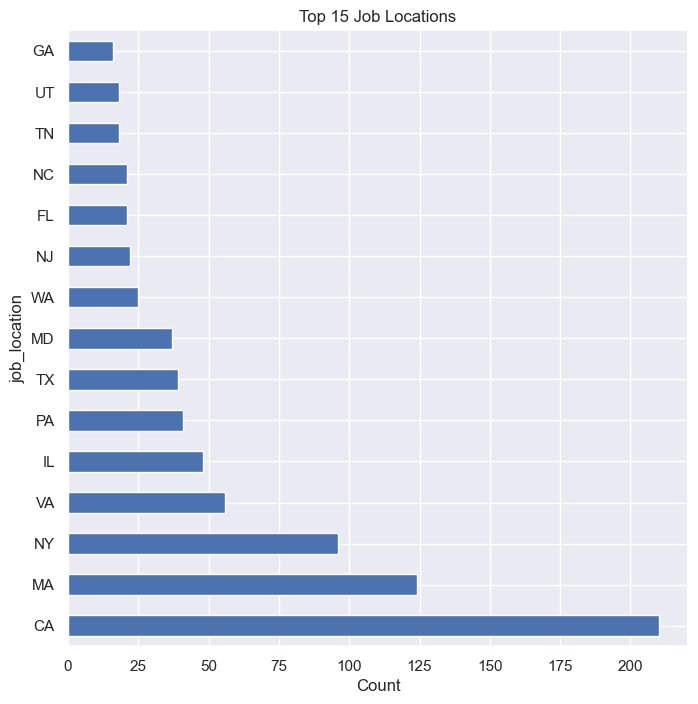

In [35]:
plt.figure(figsize=(8,8))
df["job_location"].value_counts().nlargest(15).plot(kind='barh')
plt.title('Top 15 Job Locations')
plt.xlabel('Count')
plt.show()

In [36]:
df['Size'].value_counts()

Size
1001 to 5000 employees     177
201 to 500 employees       160
51 to 200 employees        155
10000+ employees           154
501 to 1000 employees      144
5001 to 10000 employees     79
1 to 50 employees           61
Unknown                     15
-1                          11
Name: count, dtype: int64

In [37]:
# Cleaning 'Size' column
df['Size'] = df['Size'].apply(lambda x: 'Unknown' if x=='-1' else x)

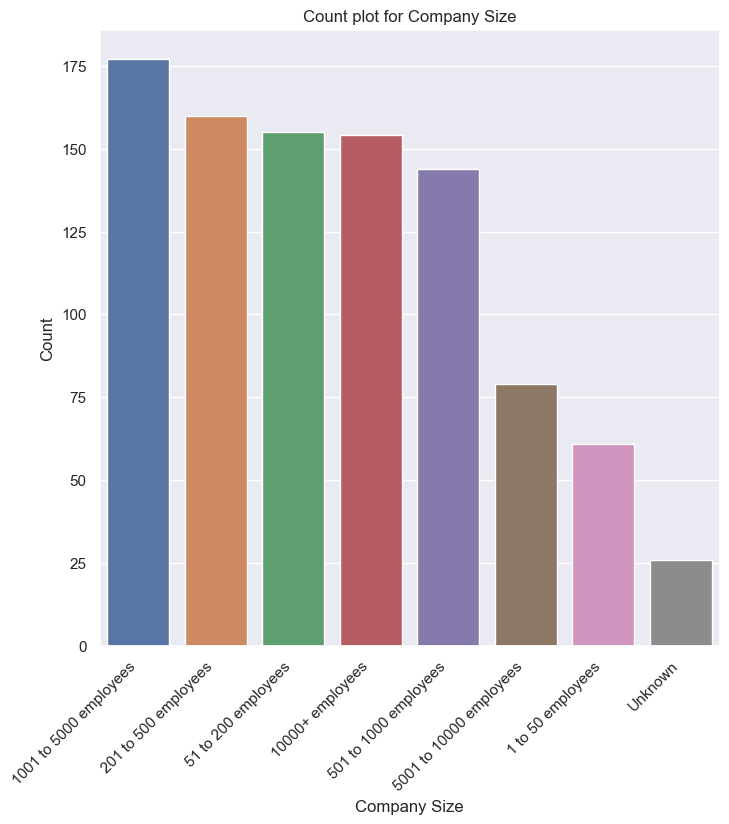

In [38]:
plt.figure(figsize=(8,8))
sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)
plt.title('Count plot for Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [39]:
# Cleaning 'Type of Ownership' column
df['Type of ownership'].value_counts()

Type of ownership
Company - Private                 532
Company - Public                  237
Nonprofit Organization             65
Subsidiary or Business Segment     40
Government                         17
Hospital                           15
College / University               15
Unknown                            11
-1                                 11
Other Organization                  5
Contract                            5
School / School District            2
Private Practice / Firm             1
Name: count, dtype: int64

In [40]:
def ownership_simplifier(text):
    if 'private' in text.lower():
        return 'Private'
    elif 'public' in text.lower():
        return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
        return 'Other Organization'
    else:
        return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)

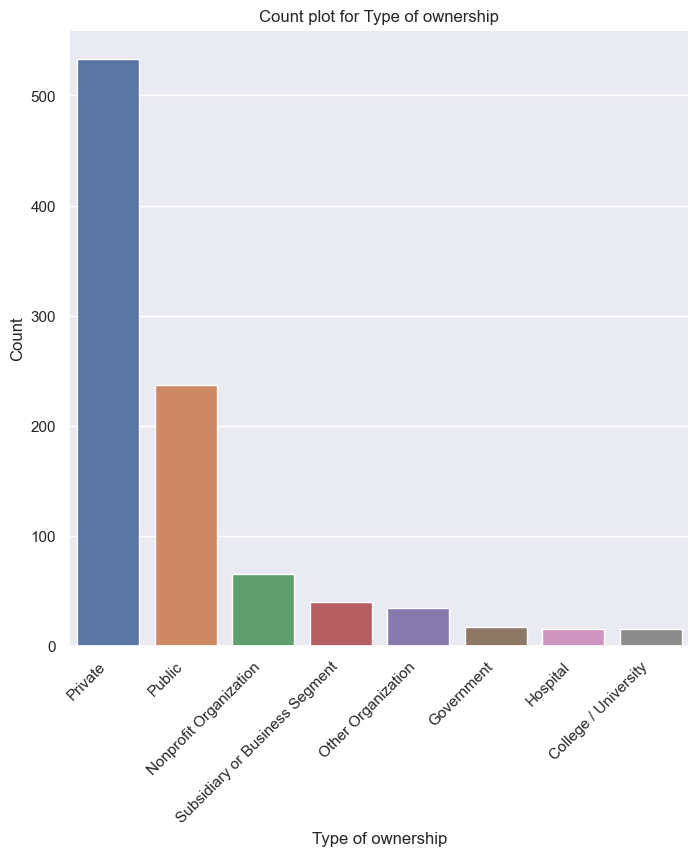

In [41]:
plt.figure(figsize=(8,8))
sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
plt.title('Count plot for Type of ownership')
plt.xlabel('Type of ownership')
plt.ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [42]:
# Cleaning 'Industry' column
df['Industry'].value_counts()

Industry
Biotech & Pharmaceuticals                   148
IT Services                                  77
Computer Hardware & Software                 70
Insurance Carriers                           65
Enterprise Software & Network Solutions      56
                                           ... 
Farm Support Services                         1
Transportation Equipment Manufacturing        1
Motion Picture Production & Distribution      1
Other Retail Stores                           1
Beauty & Personal Accessories Stores          1
Name: count, Length: 63, dtype: int64

In [43]:
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x=='-1' else x)

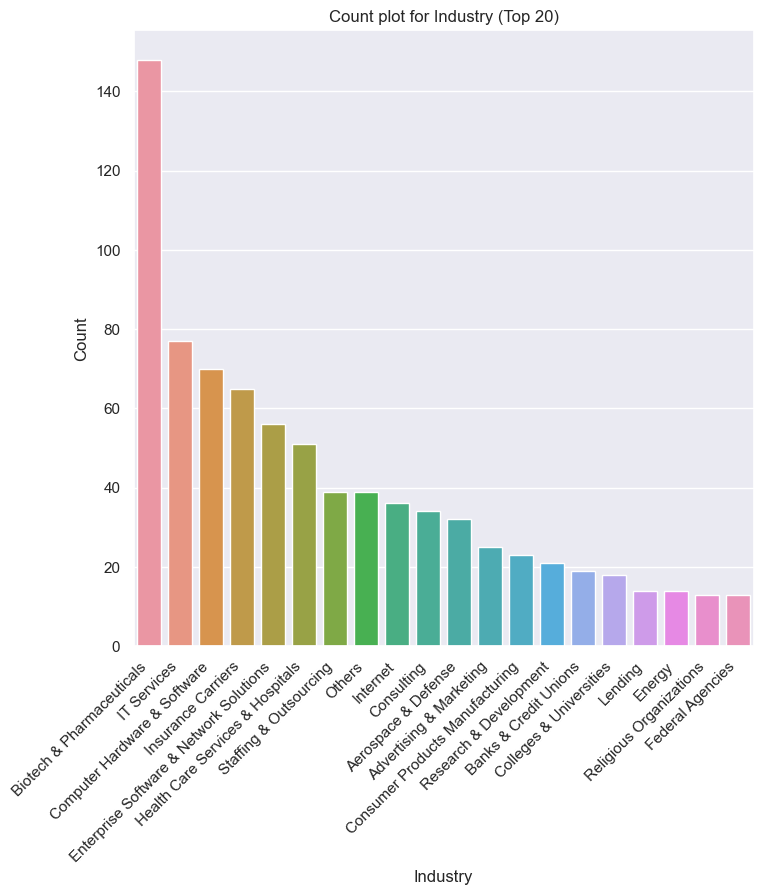

In [44]:
plt.figure(figsize=(8,8))
sns.countplot(x='Industry', data=df, order = df['Industry'].value_counts()[:20].index)
plt.title('Count plot for Industry (Top 20)')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [45]:
# Cleaning 'Sector' column
df['Sector'].value_counts()

Sector
Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
-1                                     39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry     

In [46]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)

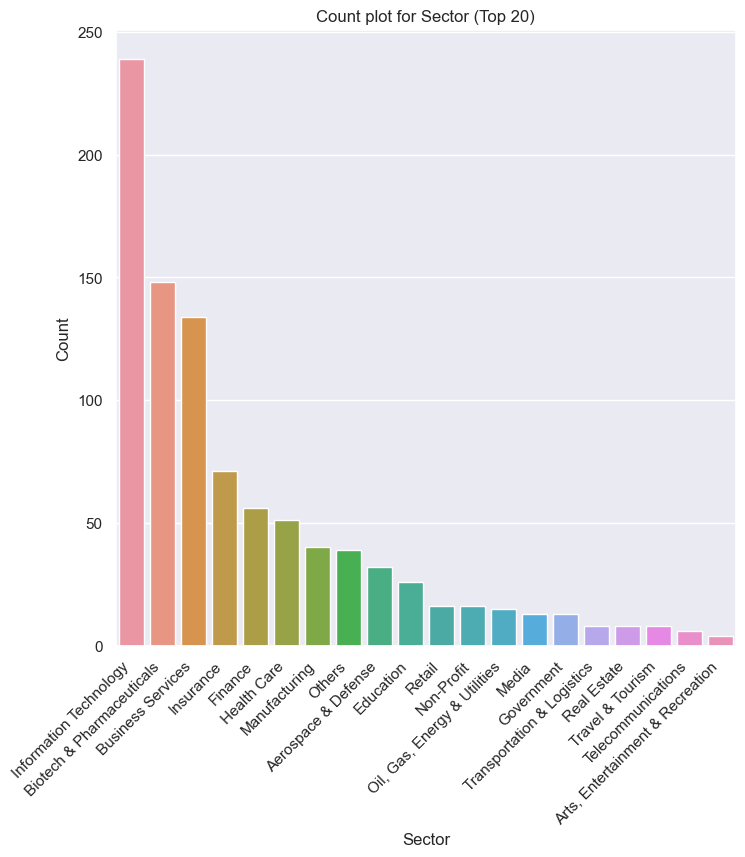

In [47]:
plt.figure(figsize=(8,8))
sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
plt.title('Count plot for Sector (Top 20)')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [48]:
# Cleaning 'Revenue' column
df['Revenue'].value_counts()

Revenue
Unknown / Non-Applicable            299
$10+ billion (USD)                  140
$100 to $500 million (USD)          107
$1 to $2 billion (USD)               68
$500 million to $1 billion (USD)     62
$25 to $50 million (USD)             59
$50 to $100 million (USD)            52
$2 to $5 billion (USD)               44
$10 to $25 million (USD)             39
$5 to $10 million (USD)              29
$5 to $10 billion (USD)              20
$1 to $5 million (USD)               17
-1                                   11
Less than $1 million (USD)            9
Name: count, dtype: int64

In [49]:
df['Revenue'] = df['Revenue'].apply(lambda x:'Unknown / Non-Applicable' if x=='-1' else x )

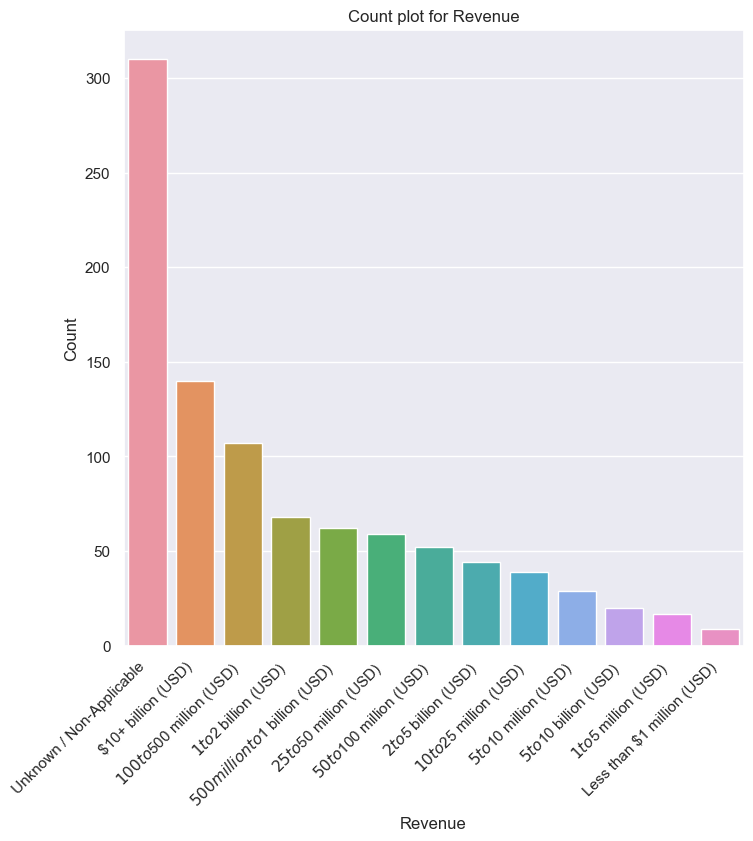

In [50]:
plt.figure(figsize=(8,8))
sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
plt.title('Count plot for Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [51]:
# Cleaning 'Competitors' column
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
954                                               Slalom
955                                                   -1
Name: Competitors, Length: 956, dtype: object

In [52]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

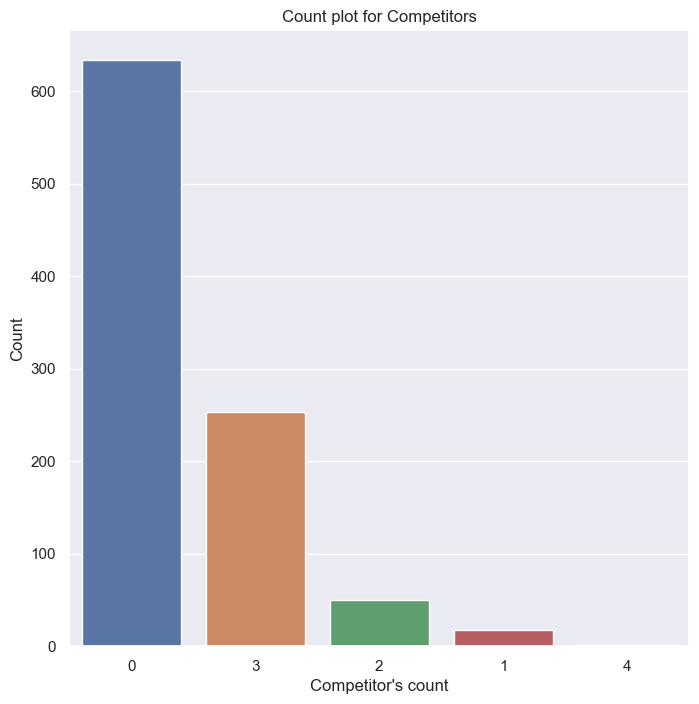

In [53]:
plt.figure(figsize=(8,8))
sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts().index)
plt.title('Count plot for Competitors')
plt.xlabel("Competitor's count")
plt.ylabel('Count')
plt.show()

In [54]:
df.head()

,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,job_title,job_seniority,Salary,job_location
0,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,data scientist,other,72.0,NM
1,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,data scientist,other,87.5,MD
2,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Private,Security Services,Business Services,$100 to $500 million (USD),0,data scientist,other,85.0,FL
3,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),3,data scientist,other,76.5,WA
4,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,3,data scientist,other,114.5,NY


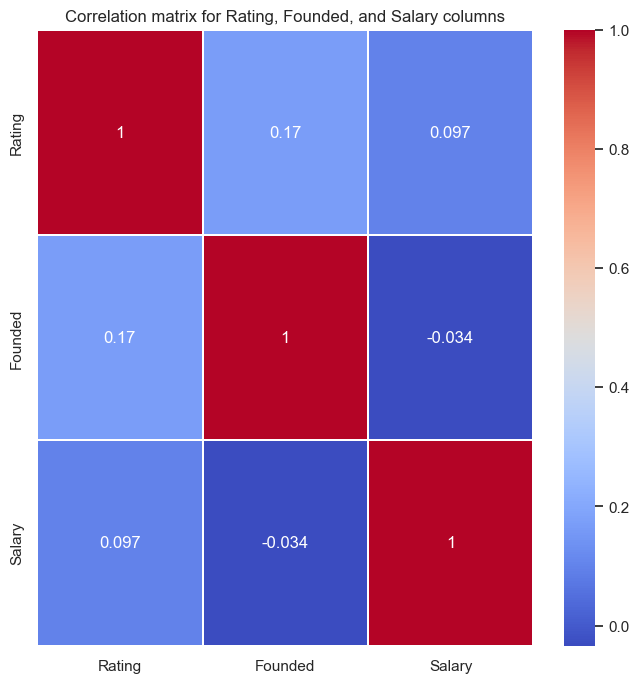

In [55]:
# Finding and plotting the correlation between numerical features
plt.figure(figsize=(8,8))
corr = df[['Rating','Founded','Salary']].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=0.05)
plt.title('Correlation matrix for Rating, Founded, and Salary columns')
plt.show()

#### Rating-Founded columns have positive correlation, whereas Salary-Founded columns have negative correlation. Also since the correlation is not high amongst all these numerical features, there is no case of multicolliniearity.

In [56]:
# Creating column of 'job_in_headquarters'
df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)

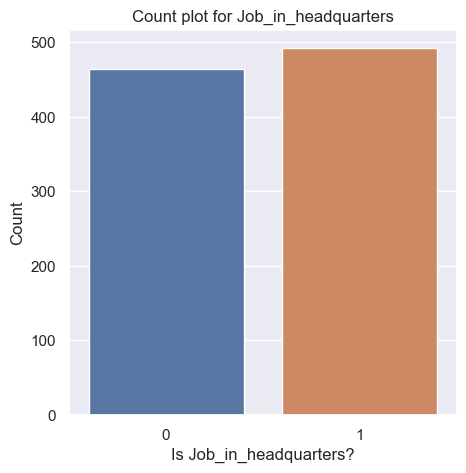

In [57]:
plt.figure(figsize=(5,5))
sns.countplot(x='job_in_headquarters', data=df)
plt.title('Count plot for Job_in_headquarters')
plt.xlabel("Is Job_in_headquarters?")
plt.ylabel('Count')
plt.show()

In [58]:
df.drop(labels=['Location'], axis=1, inplace=True)

In [59]:
# Creating columns of 'python, excel, sql, tableau' jobs
df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

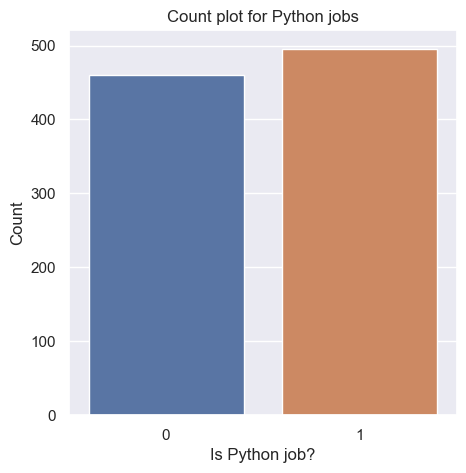

In [60]:
plt.figure(figsize=(5,5))
sns.countplot(x='python_job', data=df)
plt.title('Count plot for Python jobs')
plt.xlabel("Is Python job?")
plt.ylabel('Count')
plt.show()

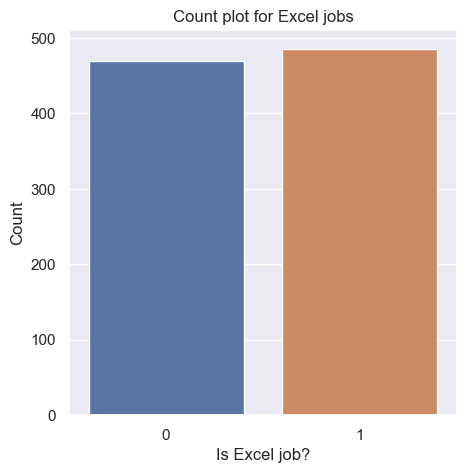

In [61]:
plt.figure(figsize=(5,5))
sns.countplot(x='excel_job', data=df)
plt.title('Count plot for Excel jobs')
plt.xlabel("Is Excel job?")
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

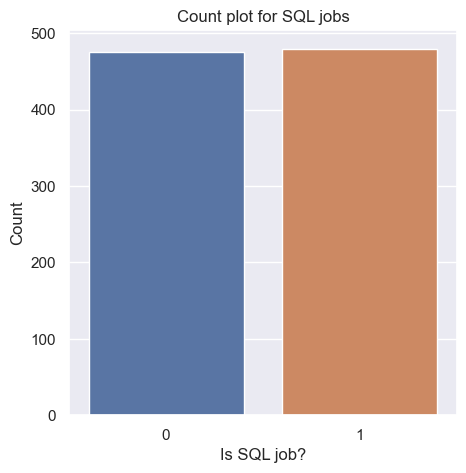

In [62]:
plt.figure(figsize=(5,5))
sns.countplot(x='sql_job', data=df)
plt.title('Count plot for SQL jobs')
plt.xlabel("Is SQL job?")
plt.ylabel('Count')

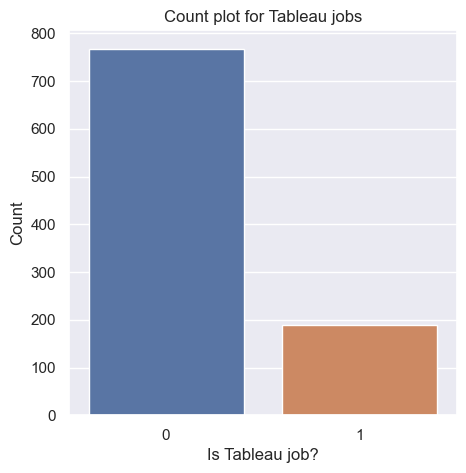

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(x='tableau_job', data=df)
plt.title('Count plot for Tableau jobs')
plt.xlabel("Is Tableau job?")
plt.ylabel('Count')
plt.show()

In [64]:
df.drop(labels=['Job Description'], axis=1, inplace=True)

In [65]:
df.shape

(956, 20)

In [66]:
df['Sector'].value_counts()

Sector
Information Technology                239
Biotech & Pharmaceuticals             148
Business Services                     134
Insurance                              71
Finance                                56
Health Care                            51
Manufacturing                          40
Others                                 39
Aerospace & Defense                    32
Education                              26
Retail                                 16
Non-Profit                             16
Oil, Gas, Energy & Utilities           15
Media                                  13
Government                             13
Transportation & Logistics              8
Real Estate                             8
Travel & Tourism                        8
Telecommunications                      6
Arts, Entertainment & Recreation        4
Construction, Repair & Maintenance      4
Consumer Services                       4
Mining & Metals                         3
Agriculture & Forestry     

In [67]:
# Trimming the 'Sector' column

# Taking top 9 Sector and replacing remaining by 'Others'
sector_list = list(df['Sector'].value_counts()[:9].index)

def sector_simplifier(text):
    if text not in sector_list:
        return 'Others'
    else:
        return text

df['Sector'] = df['Sector'].apply(sector_simplifier)

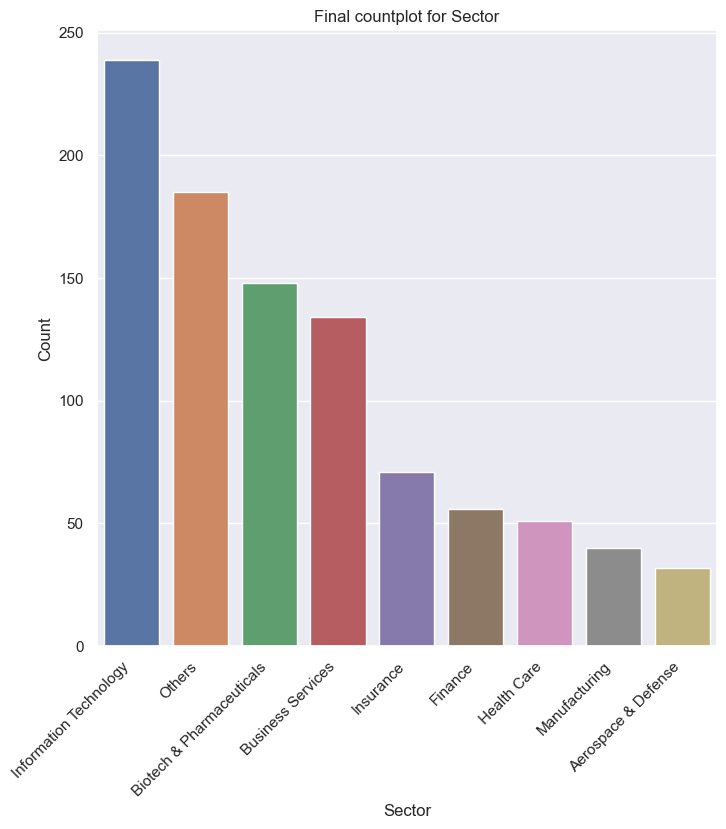

In [68]:
plt.figure(figsize=(8,8))
sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts().index)
plt.title('Final countplot for Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

In [69]:
df['job_location'].value_counts()

job_location
CA               210
MA               124
NY                96
VA                56
IL                48
PA                41
TX                39
MD                37
WA                25
NJ                22
FL                21
NC                21
TN                18
UT                18
GA                16
OH                14
CO                13
AZ                13
DC                12
MO                11
WI                10
IN                10
MI                 9
AL                 9
DE                 6
KY                 6
IA                 5
CT                 5
NE                 5
LA                 4
OR                 4
MN                 4
KS                 3
NM                 3
Virginia           3
New Jersey         2
ID                 2
RI                 2
Oregon             2
Los Angeles        1
AK                 1
United States      1
SC                 1
PR                 1
Maryland           1
Michigan           1
Name: count, dtype: i

In [70]:
# Trimming the 'job_location' column

# Taking top 9 States and replacing others by 'Others'
job_location_list = list(df['job_location'].value_counts()[:10].index)

def job_location_simplifier(text):
    if text not in job_location_list:
        return 'Others'
    else:
        return text

df['job_location'] = df['job_location'].apply(job_location_simplifier)

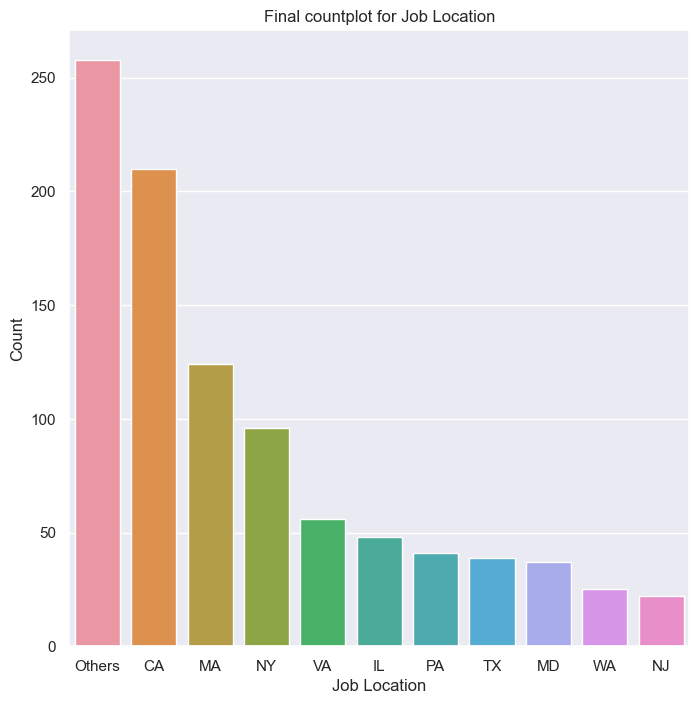

In [71]:
plt.figure(figsize=(8,8))
sns.countplot(x='job_location', data=df, order = df['job_location'].value_counts().index)
plt.title('Final countplot for Job Location')
plt.xlabel('Job Location')
plt.ylabel('Count')
plt.show()

In [72]:
df.drop(labels=['Salary Estimate', 'Company Name', 'Headquarters', 'Industry', 'job_location'], axis=1, inplace=True)

In [73]:
df.columns

Index(['Rating', 'Size', 'Founded', 'Type of ownership', 'Sector', 'Revenue',
       'Competitors', 'job_title', 'job_seniority', 'Salary',
       'job_in_headquarters', 'python_job', 'excel_job', 'sql_job',
       'tableau_job'],
      dtype='object')

In [74]:
df.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)

#### Handling ordinal categorical features<br/>Ordinal features are categorical variables that have some order associated with them (e.g. size, rating, remark, etc.)

In [75]:
# Mapping ranks to 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['company_size'] = df['company_size'].map(size_map)

In [76]:
# Mapping ranks to 'revenue	' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

df['revenue'] = df['revenue'].map(revenue_map)

In [77]:
# Mapping ranks to 'job_seniority	' column
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

df['job_seniority'] = df['job_seniority'].map(job_seniority_map)

#### Handling nominal categorical features<br/>Nominal features are categorical variables that have no numerical importance (e.g. occupation, name, etc.)

In [78]:
# Removing 'type_of_ownership' column using get_dummies()
df = pd.get_dummies(columns=['type_of_ownership'], data=df, prefix='ownership')

In [79]:
# Removing 'sector' column using get_dummies()
df = pd.get_dummies(columns=['sector'], data=df)

In [80]:
# Removing 'job_title' column using get_dummies()
df = pd.get_dummies(columns=['job_title'], data=df)

In [81]:
# Removing 'others' column to reduce dimentionality and avoid dummy variable trap
df.drop(labels=['ownership_Other Organization', 'sector_Others', 'job_title_other'], axis=1, inplace=True)
df.shape

(956, 33)

#### Feature Selection<br/>Selecting features based on information gain (mutual_info_regression) and correlation matrix

In [82]:
X = df.drop('salary', axis=1)
y = df['salary']

In [83]:
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x0000011AFE9767A0>)

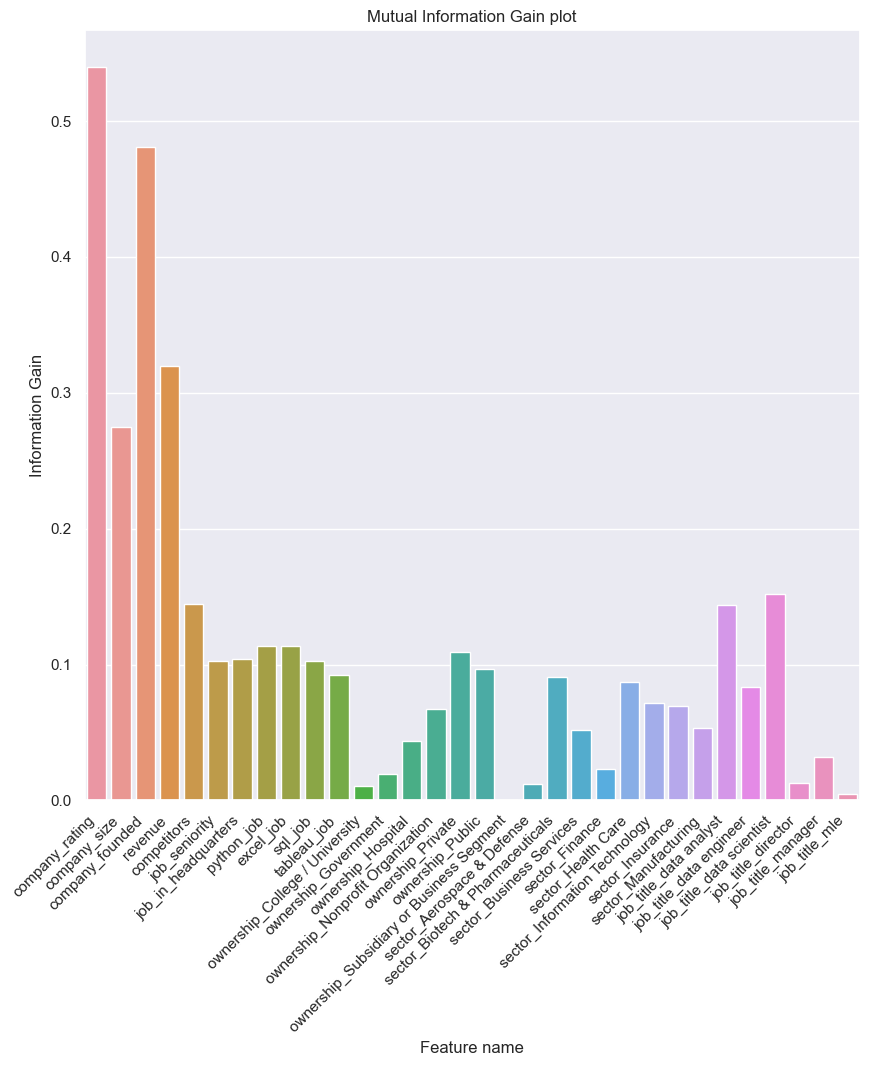

In [84]:
plt.figure(figsize=(10,10))
sns.barplot(x=X.columns, y=fs.scores_)
plt.title('Mutual Information Gain plot')
plt.xlabel('Feature name')
plt.ylabel('Information Gain')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

#### From feature importance chart, it is evident that there are atleast 20 features that impact the target variable.

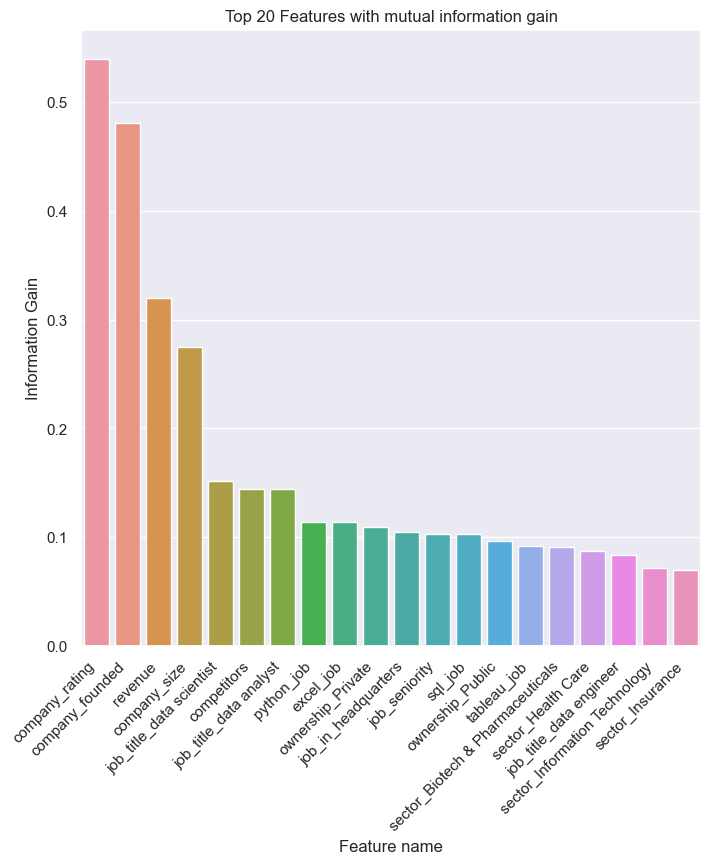

In [85]:
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top20_feature = feature_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
sns.barplot(x=top20_feature.index, y=top20_feature['Score'])
plt.title('Top 20 Features with mutual information gain')
plt.xlabel('Feature name')
plt.ylabel('Information Gain')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show()

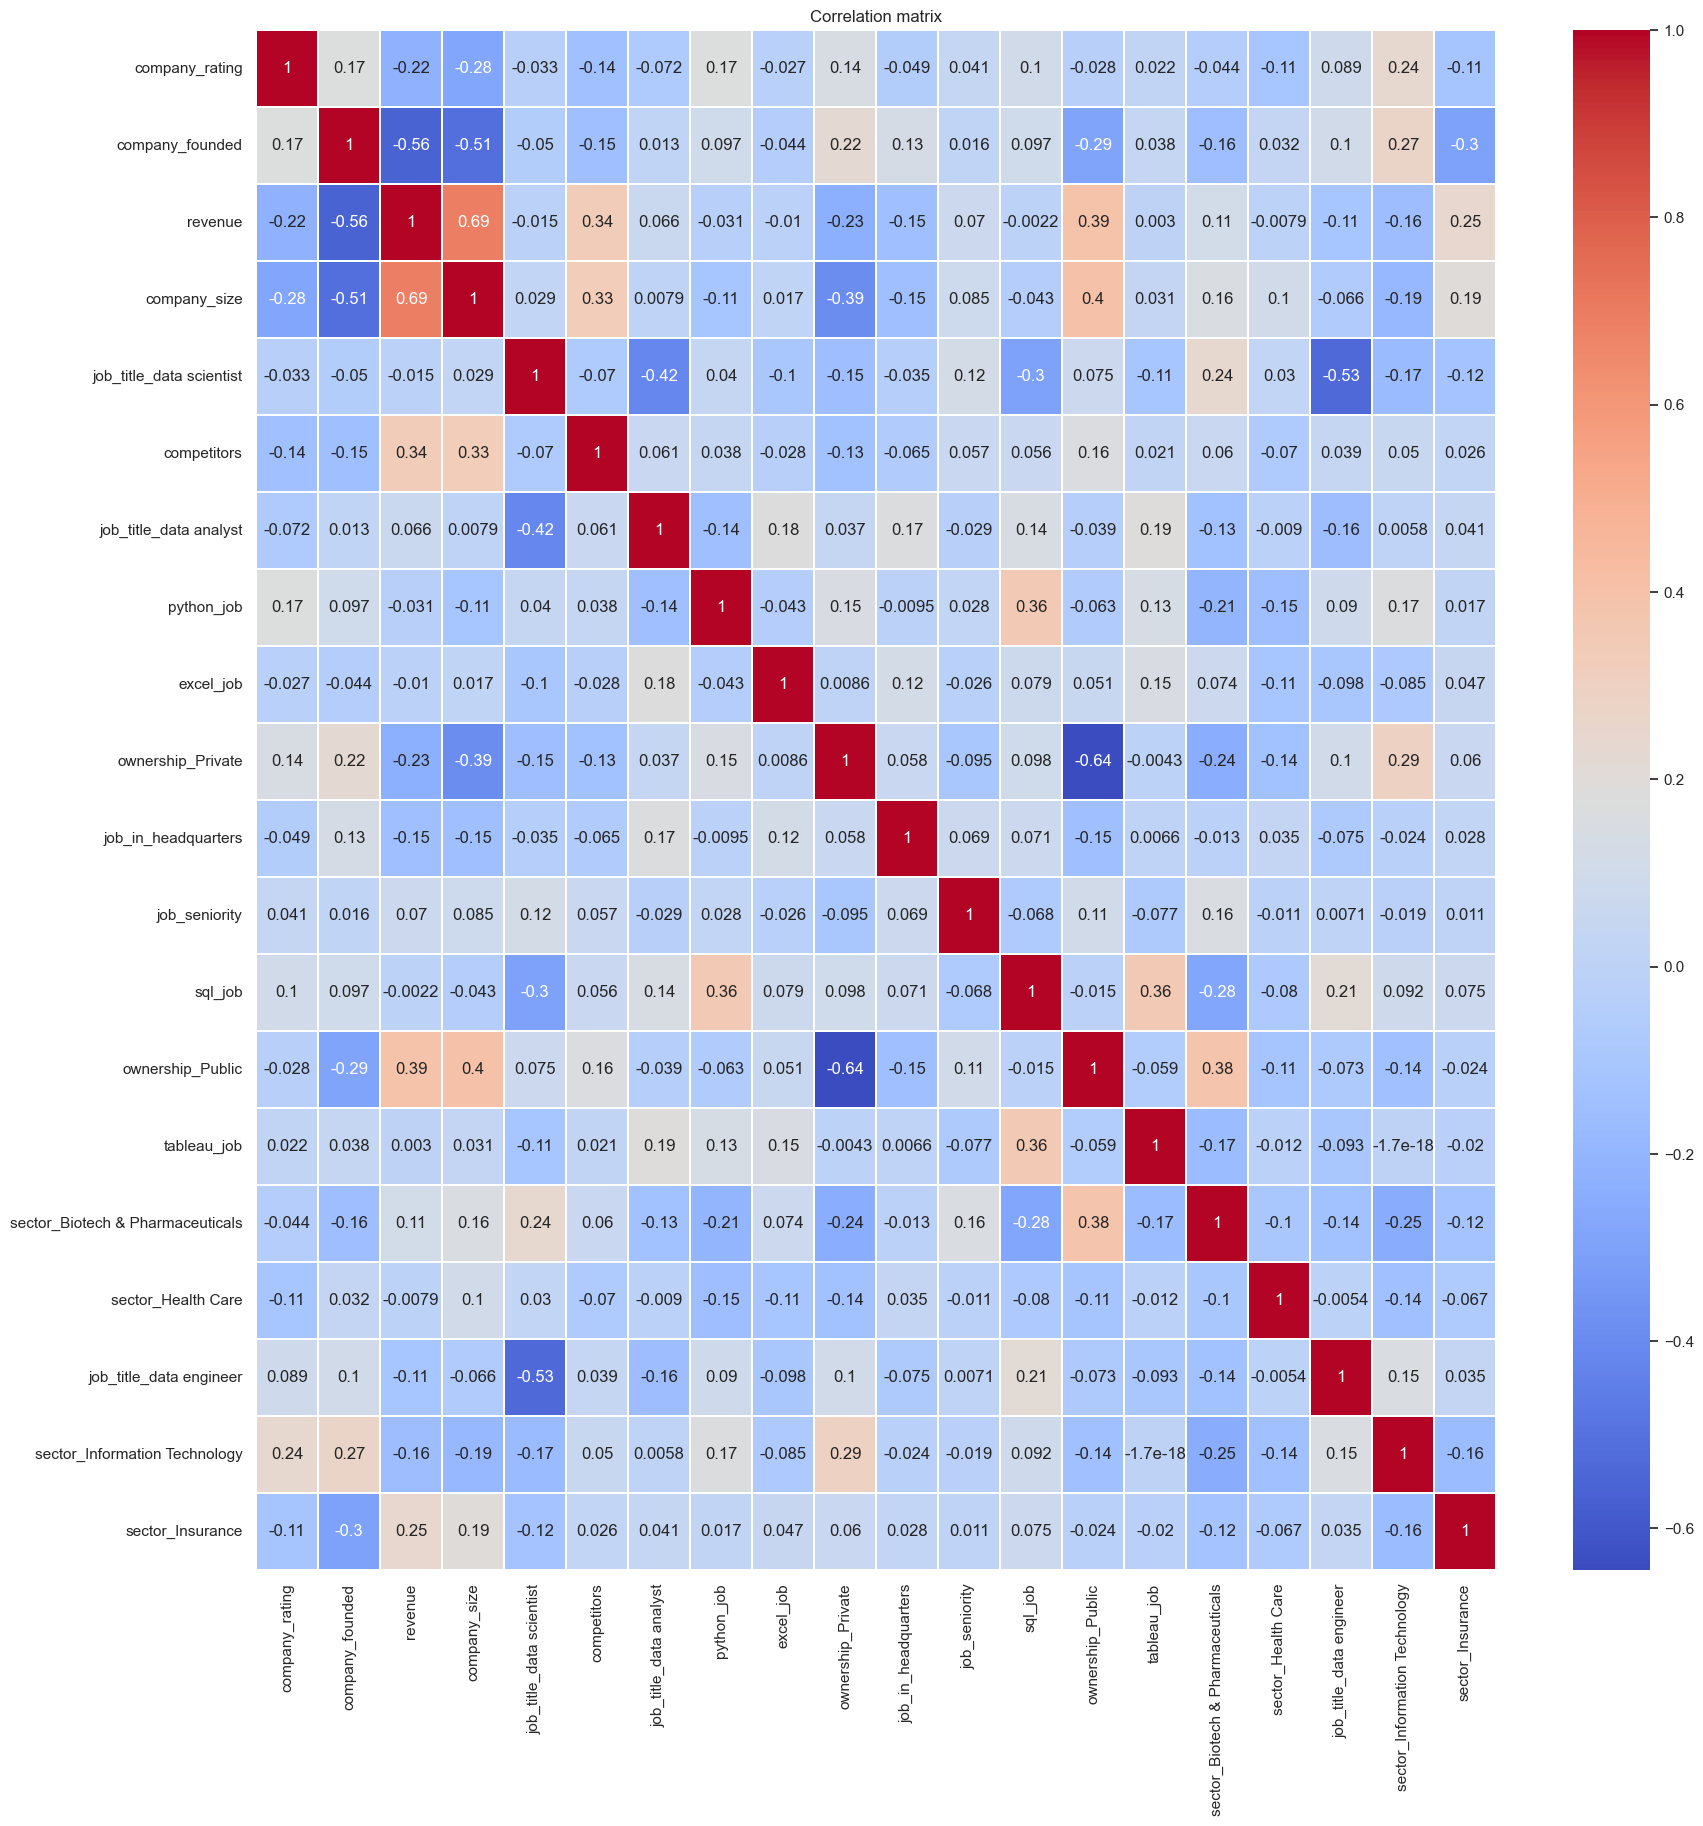

In [86]:
# Finding and plotting the correlation matrix for top20 features
plt.figure(figsize=(20,20))
corr = X[top20_feature.index].corr()

# Generate a mask for the upper triangle
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation matrix')
plt.show()

#### Range of correlation are as follows:
- Strong correlation: X > 0.7
- Moderate correlation: 0.5 < X < 0.7
- Weak correlation: X < 0.5
<br/>

#### From the correlation matrix, it is evident that features (ownership_Public, ownership_Private), (company_size, company_founded), (job_title_data engineer, job_title_data scientist) and (company_founded, revenue) are moderately correlated. Hence, dropping 'Revenue', 'ownership_Public', 'job_title_data engineer' and 'company_size' features.

In [87]:
X = X[top20_feature.index]
X.drop(labels=['ownership_Public', 'company_size', 'revenue', 'job_title_data engineer'], axis=1, inplace=True)

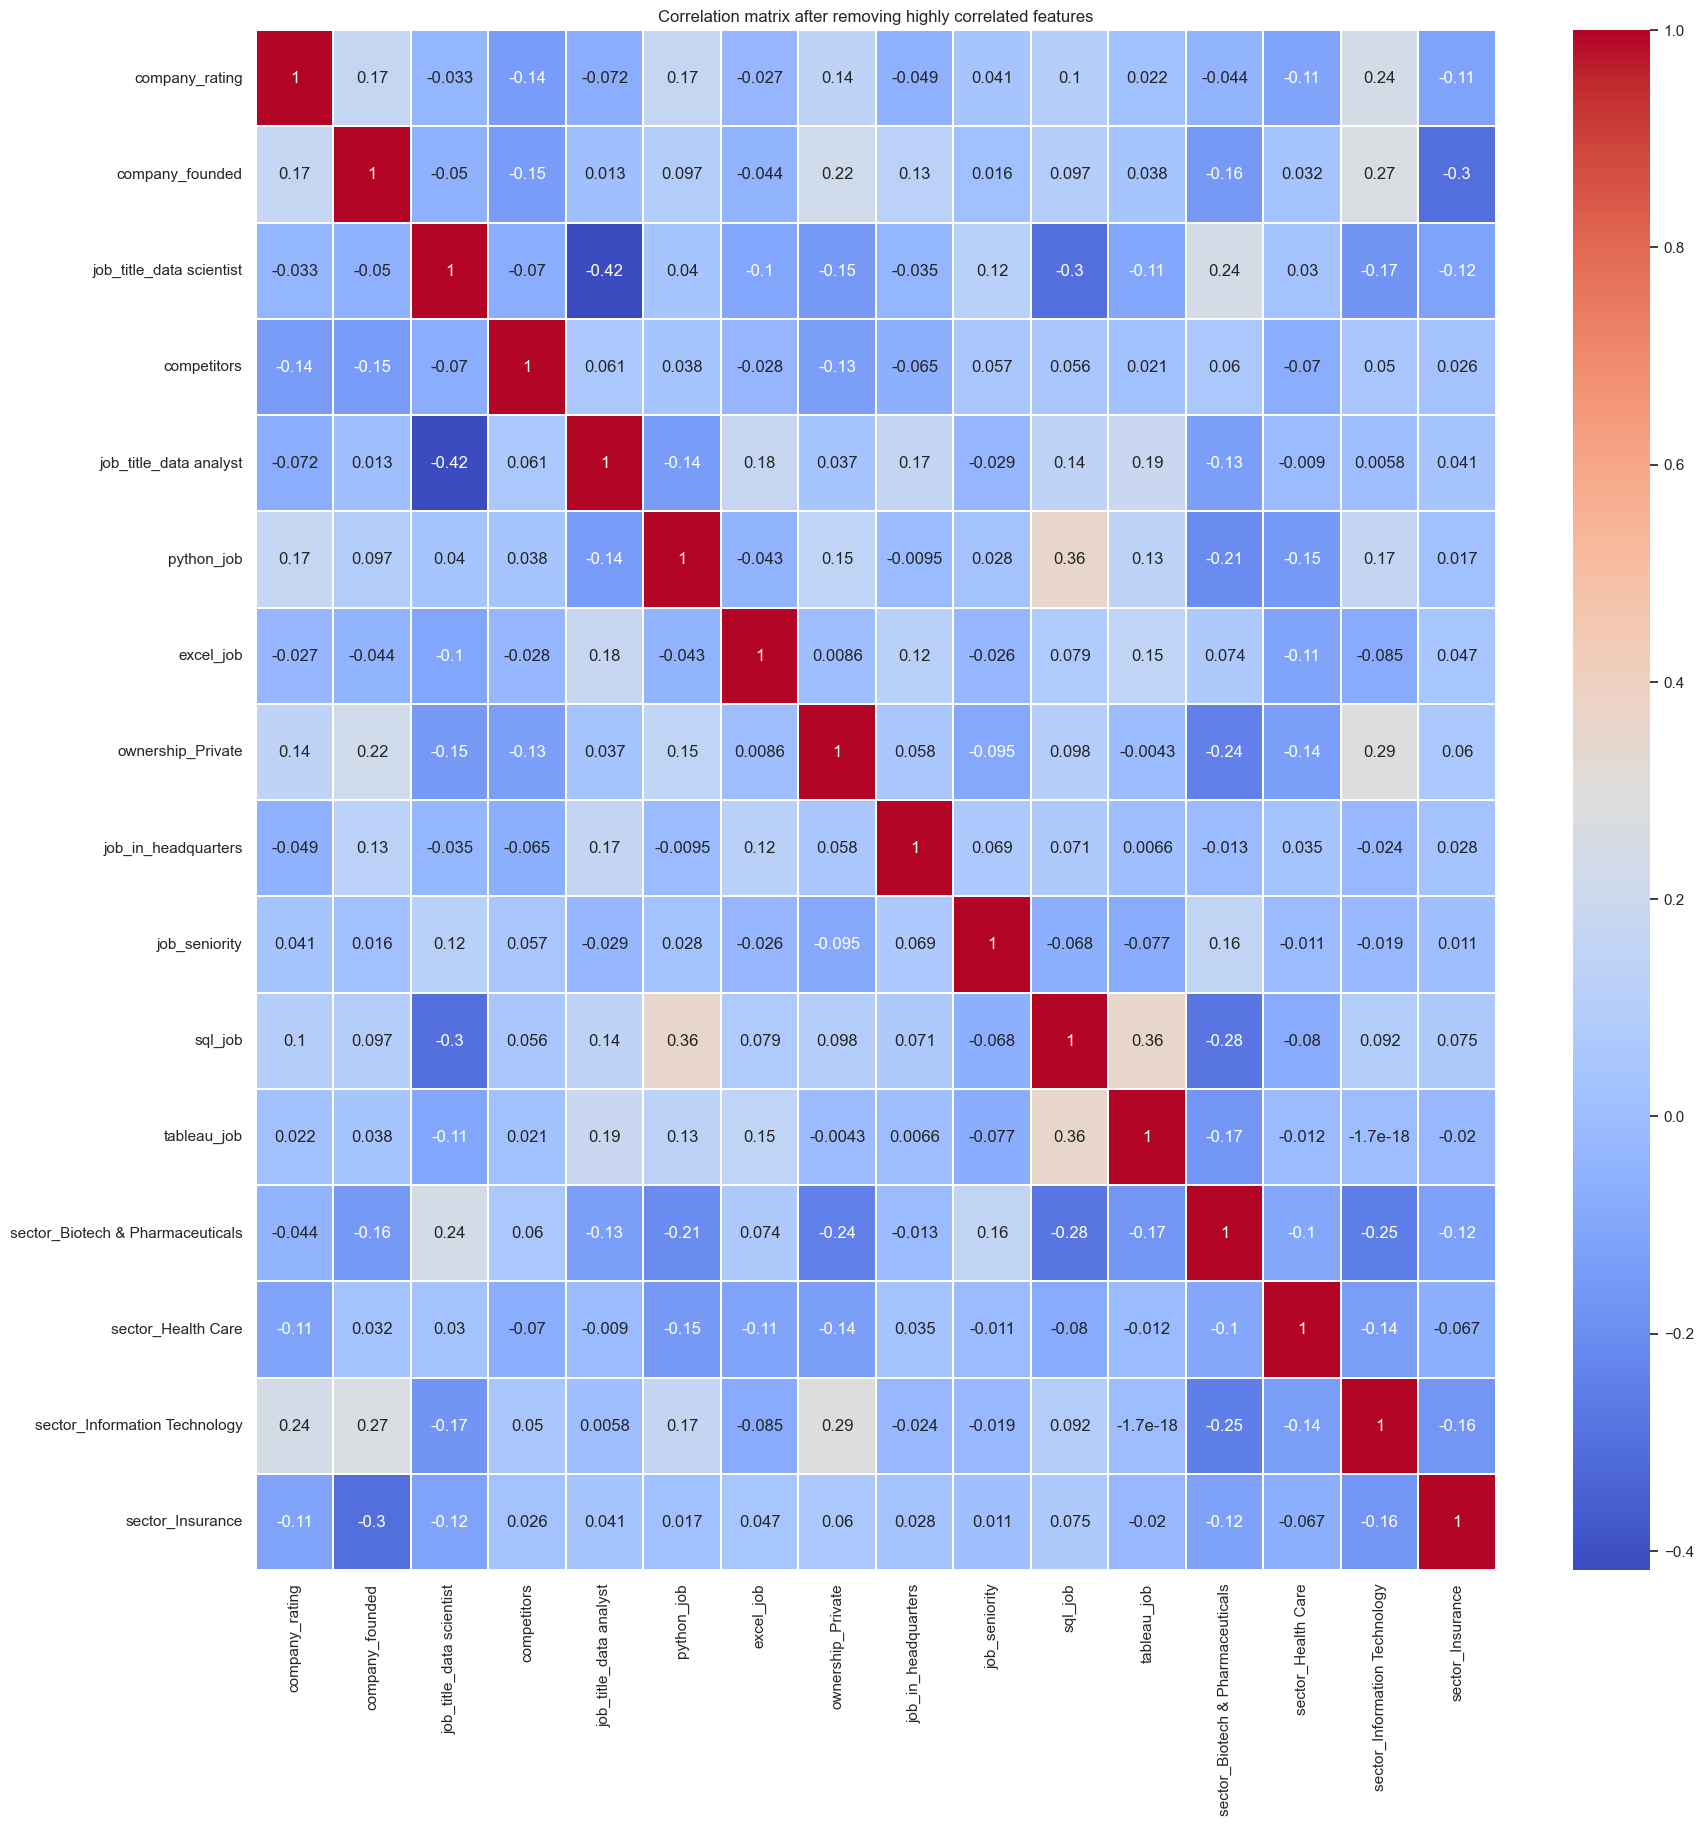

In [88]:
# Finding and plotting the correlation matrix for top 18 features
plt.figure(figsize=(20, 20))
corr = X.corr()

# Generate a mask for the upper triangle
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.1)
plt.title('Correlation matrix after removing highly correlated features')
plt.show()